In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cfg_file = 'yolov3.cfg'
weight_file = 'yolov3.weights'
namesfile = 'coco.names'
image_path = 'hit.jpg'

In [3]:
net = cv2.dnn.readNet(weight_file, cfg_file)

In [4]:
with open(namesfile, 'r') as f:
    classes = f.read().strip().split('\n')


In [5]:
image_path = 'hit.jpg'
image = cv2.imread(image_path)
height, width = image.shape[:2]


In [6]:
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)


In [7]:
layer_names = net.getUnconnectedOutLayersNames()
outs = net.forward(layer_names)


In [8]:
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5  # confidence threshold

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > conf_threshold:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


In [9]:
nms_threshold = 0.4
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)


In [10]:
for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    confidence = confidences[i]
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(image, f'{label} {confidence:.2f}', (x, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)


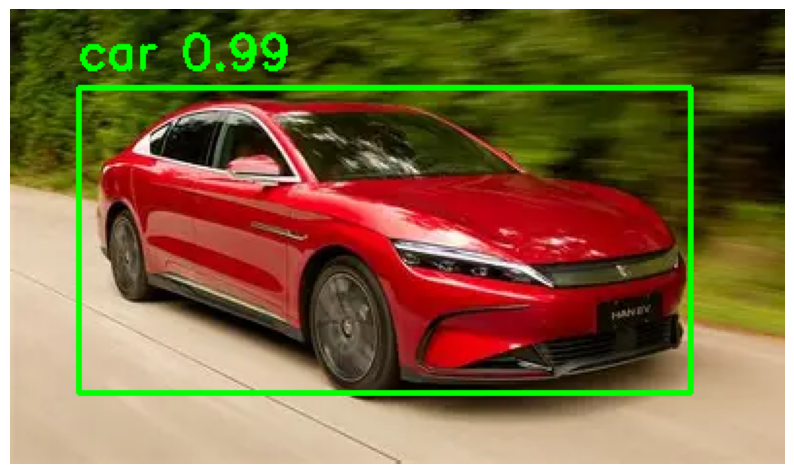

In [20]:
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
